In [114]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [115]:
PATH = '/home/sid/Desktop/Data Science Project/iris-dataset-project'

In [116]:
df = pd.read_csv('Iris.csv')
print(df.head(5))
print(len(df))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
150


In [117]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [35]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [22]:
species = df['Species'].unique()
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
setosa = df.loc[df['Species']=='Iris-setosa']
versi = df.loc[df['Species']=='Iris-versicolor']
virgin = df.loc[df['Species']=='Iris-virginica']

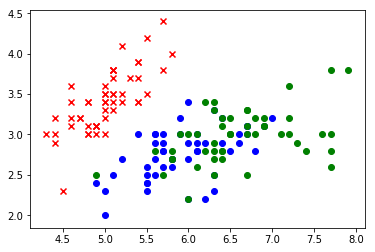

In [32]:
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], c = 'r', marker='x')
plt.scatter(versi['SepalLengthCm'], versi['SepalWidthCm'], c = 'b')
plt.scatter(virgin['SepalLengthCm'], virgin['SepalWidthCm'], c = 'g')
plt.show()

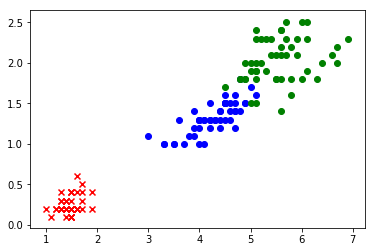

In [37]:
plt.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], c = 'r', marker='x')
plt.scatter(versi['PetalLengthCm'], versi['PetalWidthCm'], c = 'b')
plt.scatter(virgin['PetalLengthCm'], virgin['PetalWidthCm'], c = 'g')
plt.show()

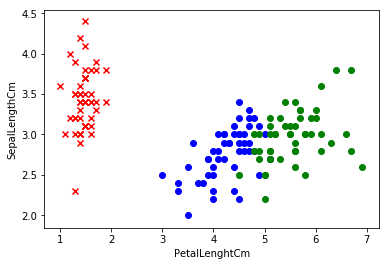

In [44]:
plt.scatter(setosa['PetalLengthCm'], setosa['SepalWidthCm'], c = 'r', marker='x')
plt.scatter(versi['PetalLengthCm'], versi['SepalWidthCm'], c = 'b')
plt.scatter(virgin['PetalLengthCm'], virgin['SepalWidthCm'], c = 'g')
plt.xlabel('PetalLenghtCm')
plt.ylabel('SepalLengthCm')
plt.show()

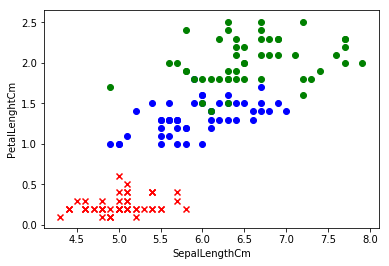

In [45]:
plt.scatter(setosa['SepalLengthCm'], setosa['PetalWidthCm'], c = 'r', marker='x')
plt.scatter(versi['SepalLengthCm'], versi['PetalWidthCm'], c = 'b')
plt.scatter(virgin['SepalLengthCm'], virgin['PetalWidthCm'], c = 'g')
plt.ylabel('PetalLenghtCm')
plt.xlabel('SepalLengthCm')
plt.show()

In [60]:
array = df.values

In [105]:
x = array[:,0:4]
y = array[:,5]
print(array[:,0:4])

[[1 5.1 3.5 1.4]
 [2 4.9 3.0 1.4]
 [3 4.7 3.2 1.3]
 [4 4.6 3.1 1.5]
 [5 5.0 3.6 1.4]
 [6 5.4 3.9 1.7]
 [7 4.6 3.4 1.4]
 [8 5.0 3.4 1.5]
 [9 4.4 2.9 1.4]
 [10 4.9 3.1 1.5]
 [11 5.4 3.7 1.5]
 [12 4.8 3.4 1.6]
 [13 4.8 3.0 1.4]
 [14 4.3 3.0 1.1]
 [15 5.8 4.0 1.2]
 [16 5.7 4.4 1.5]
 [17 5.4 3.9 1.3]
 [18 5.1 3.5 1.4]
 [19 5.7 3.8 1.7]
 [20 5.1 3.8 1.5]
 [21 5.4 3.4 1.7]
 [22 5.1 3.7 1.5]
 [23 4.6 3.6 1.0]
 [24 5.1 3.3 1.7]
 [25 4.8 3.4 1.9]
 [26 5.0 3.0 1.6]
 [27 5.0 3.4 1.6]
 [28 5.2 3.5 1.5]
 [29 5.2 3.4 1.4]
 [30 4.7 3.2 1.6]
 [31 4.8 3.1 1.6]
 [32 5.4 3.4 1.5]
 [33 5.2 4.1 1.5]
 [34 5.5 4.2 1.4]
 [35 4.9 3.1 1.5]
 [36 5.0 3.2 1.2]
 [37 5.5 3.5 1.3]
 [38 4.9 3.1 1.5]
 [39 4.4 3.0 1.3]
 [40 5.1 3.4 1.5]
 [41 5.0 3.5 1.3]
 [42 4.5 2.3 1.3]
 [43 4.4 3.2 1.3]
 [44 5.0 3.5 1.6]
 [45 5.1 3.8 1.9]
 [46 4.8 3.0 1.4]
 [47 5.1 3.8 1.6]
 [48 4.6 3.2 1.4]
 [49 5.3 3.7 1.5]
 [50 5.0 3.3 1.4]
 [51 7.0 3.2 4.7]
 [52 6.4 3.2 4.5]
 [53 6.9 3.1 4.9]
 [54 5.5 2.3 4.0]
 [55 6.5 2.8 4.6]
 [56 5.7 2.8 4.5]
 

In [106]:
valid_size = 0.20
seed = 7
scoring = 'accuracy'
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = valid_size,random_state = seed)

In [107]:
models = []
models.append(('LogReg', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('Gaussian-Naive-Bayes', GaussianNB()))
models.append(('SVectorMachine', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogReg: 0.916667 (0.074536)
LDA: 1.000000 (0.000000)
K-NN: 0.991667 (0.025000)
DecisionTree: 0.991667 (0.025000)
Gaussian-Naive-Bayes: 1.000000 (0.000000)
SVectorMachine: 1.000000 (0.000000)


In [111]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print(accuracy_score(y_test, predictions))
print(cm)
print(classification_report(y_test, predictions))

1.0
[[ 7  0  0]
 [ 0 12  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        11

    avg / total       1.00      1.00      1.00        30



In [109]:
import seaborn as sn

/home/sid/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


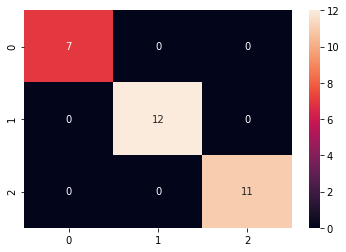

In [113]:
sn.heatmap(cm, annot=True)